In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MultiHeadAttention
from sentence_transformers import SentenceTransformer


/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# EDA and Data Cleanup
removed unnecessary columns, converted currency to dollars, checked for null values, changed data types where needed and cleaned text columns by removing special characters and repeated word

In [2]:
#Import CSV 
original_df = pd.read_csv('amazon.csv')


In [3]:
original_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:

df = original_df[["product_name", "category", "discounted_price", "actual_price", "discount_percentage", "rating", "rating_count", "about_product", "review_title"]]

In [5]:
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second..."


In [6]:
# Define the exchange rate (example rate)
exchange_rate = 83  # 1 USD = 83 INR

# Clean up the 'discounted_price' and 'actual_price' columns (remove ₹ and commas)
df["discounted_price"] = df["discounted_price"].replace({'₹': '', ',': ''}, regex=True).astype(float).round(2)
df["actual_price"] = df["actual_price"].replace({'₹': '', ',': ''}, regex=True).astype(float).round(2)

# Convert prices from INR to USD
df["discounted_price_usd"] = round(df["discounted_price"] / exchange_rate, 2)
df["actual_price_usd"] = round(df["actual_price"] / exchange_rate, 2)

# Display the updated dataframe
print(df[["discounted_price", "actual_price", "discounted_price_usd", "actual_price_usd"]])


      discounted_price  actual_price  discounted_price_usd  actual_price_usd
0                399.0        1099.0                  4.81             13.24
1                199.0         349.0                  2.40              4.20
2                199.0        1899.0                  2.40             22.88
3                329.0         699.0                  3.96              8.42
4                154.0         399.0                  1.86              4.81
...                ...           ...                   ...               ...
1460             379.0         919.0                  4.57             11.07
1461            2280.0        3045.0                 27.47             36.69
1462            2219.0        3080.0                 26.73             37.11
1463            1399.0        1890.0                 16.86             22.77
1464            2863.0        3690.0                 34.49             44.46

[1465 rows x 4 columns]


/var/folders/fg/8tsgxb6s07x1cjstms_qn8pc0000gn/T/ipykernel_47553/3725493573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["discounted_price"] = df["discounted_price"].replace({'₹': '', ',': ''}, regex=True).astype(float).round(2)
/var/folders/fg/8tsgxb6s07x1cjstms_qn8pc0000gn/T/ipykernel_47553/3725493573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["actual_price"] = df["actual_price"].replace({'₹': '', ',': ''}, regex=True).astype(float).round(2)
/var/folders/fg/8tsgxb6s07x1cjstms_qn8pc00

In [7]:
df = df.drop(columns=["discounted_price", "actual_price"])

In [8]:
df.head()

,product_name,category,discount_percentage,rating,rating_count,about_product,review_title,discounted_price_usd,actual_price_usd
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",4.81,13.24
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",2.40,4.20
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...",2.40,22.88
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...",3.96,8.42
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...",1.86,4.81


In [9]:
# Remove special characters from product names
df['product_name'] = df['product_name'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)


In [10]:
# Convert percentage to numeric
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float) / 100

In [11]:
# Check for NaN values in the entire dataframe
print(df.isna().sum())


product_name            0
category                0
discount_percentage     0
rating                  0
rating_count            2
about_product           0
review_title            0
discounted_price_usd    0
actual_price_usd        0
dtype: int64


In [12]:
# Remove commas from rating_count and convert to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['rating_count'] = df['rating_count'].fillna(0)  # Replace NaN values with 0

In [13]:
# Convert text columns to lowercase (if needed)
df['review_title'] = df['review_title'].str.lower()

In [16]:
def remove_repeated_words(text):
    # Split by pipe '|' separator, remove duplicates, and rejoin the unique words
    return '|'.join(dict.fromkeys(text.split('|')))

# Apply the function to the category column
df['category'] = df['category'].apply(remove_repeated_words)

# Check the result
df['category'].unique()


array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [17]:
# To eventually scale this rating column we needed to know data type 
df.rating.describe()

count     1465
unique      28
top        4.1
freq       244
Name: rating, dtype: object

In [18]:
df["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [19]:
# Find instances of '|' in the rating column
ratings = df.loc[df['rating'].str.contains('\\|', na=False)]
ratings


,product_name,category,discount_percentage,rating,rating_count,about_product,review_title,discounted_price_usd,actual_price_usd
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",0.16,|,992.0,No Installation is provided for this product|1...,"decent product,doesn't pick up sand,ok ok,must...",25.29,30.11


In [20]:
# Drop row 1279 from the DataFrame
df = df.drop(1279).reset_index(drop=True)


In [21]:
#data type for rating column to float
df['rating'] =  df['rating'].astype(float)

# Tab Transformer Model 
The cleaned Amazon data is fed to the Keras Tab Transformer Model from HuggingFace. Before fitting the model the data was scaled for numerical data and either encoded or embedded. 

### Tab Transformer Model - Encoded Categorical Data 

In [22]:

# Step 1: Preprocess the Data
categorical_columns = ['product_name']
numerical_columns = ['actual_price_usd', 'discounted_price_usd', 'rating_count', 'rating']  # Now includes discounted_price_usd
target = 'discount_percentage'

# Step 2: Handle categorical data and label encoding
label_encoders = {}
vocab_sizes = []

# Apply LabelEncoder only to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure values are treated as strings
    label_encoders[col] = le
    vocab_sizes.append(len(le.classes_) + 1)  # Add 1 for unseen values in the test set

# Step 3: Standardize numerical data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 4: Prepare data for training and testing
X = df[categorical_columns + numerical_columns]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the TabTransformer Model
def build_encode_tab_transformer(n_categorical, n_numerical, embed_dim=32, num_heads=4, dropout_rate=0.1, vocab_sizes=None):
    # Categorical inputs
    categorical_inputs = [Input(shape=(1,), name=f'cat_input_{i}') for i in range(n_categorical)]
    
    # Embedding layers for each categorical feature
    embeddings = [
        Embedding(input_dim=vocab_sizes[i], output_dim=embed_dim)(cat_input) 
        for i, cat_input in enumerate(categorical_inputs)
    ]
    
    # Apply multi-head attention to embeddings
    attention_layers = [MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(emb, emb) for emb in embeddings]
    
    # Concatenate the attention outputs
    concat_attention = Concatenate(axis=1)(attention_layers)
    x = LayerNormalization(epsilon=1e-6)(concat_attention)
    x = Dropout(dropout_rate)(x)
    
    # Numerical inputs
    numerical_input = Input(shape=(n_numerical,), name='num_input')
    
    # Concatenate categorical (processed) and numerical inputs
    concatenated = Concatenate(axis=1)([Flatten()(x), numerical_input])
    
    # MLP Layers for final regression
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)  # Regression output
    
    # Combine the model
    model = Model(inputs=categorical_inputs + [numerical_input], outputs=output)
    model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
    return model

# Instantiate and train the model
encoded_model = build_encode_tab_transformer(n_categorical=len(categorical_columns), n_numerical=len(numerical_columns), vocab_sizes=vocab_sizes)

# Prepare inputs for the model
train_inputs = [X_train[col].values for col in categorical_columns] + [X_train[numerical_columns].values]
test_inputs_encoded = [X_test[col].values for col in categorical_columns] + [X_test[numerical_columns].values]

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = encoded_model.fit(train_inputs, y_train, validation_data=(test_inputs_encoded, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Step 6: Evaluate the model
test_loss, test_mae = encoded_model.evaluate(test_inputs_encoded, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/100


/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


30/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.2718

/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1213 - mean_absolute_error: 0.2601 - val_loss: 0.0463 - val_mean_absolute_error: 0.1775
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.1716 - val_loss: 0.0410 - val_mean_absolute_error: 0.1626
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367 - mean_absolute_error: 0.1476 - val_loss: 0.0385 - val_mean_absolute_error: 0.1528
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.1198 - val_loss: 0.0430 - val_mean_absolute_error: 0.1627
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0946 - val_loss: 0.0415 - val_mean_absolute_error: 0.1585
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0808 - val_loss: 0.0412 - val_mean_absolute_error: 0.1590
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0720 - val_loss: 0.0408 - 

 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step

/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
     Actual Discount Percentage  Predicted Discount Percentage  Difference
0                          0.25                       0.386591    0.136591
1                          0.60                       0.475437    0.124563
2                          0.60                       0.680353    0.080353
3                          0.50                       0.409736    0.090264
4                          0.58                       0.580263    0.000263
..                          ...                            ...         ...
288                        0.59                       0.709312    0.119312
289                        0.28                       0.361421    0.081421
290                        0.65                       0.430543    0.219457
291                        0.21                       0.543267    0.333267
292                        0.22                       0.420966    0.200966

[293 rows x 3 columns]


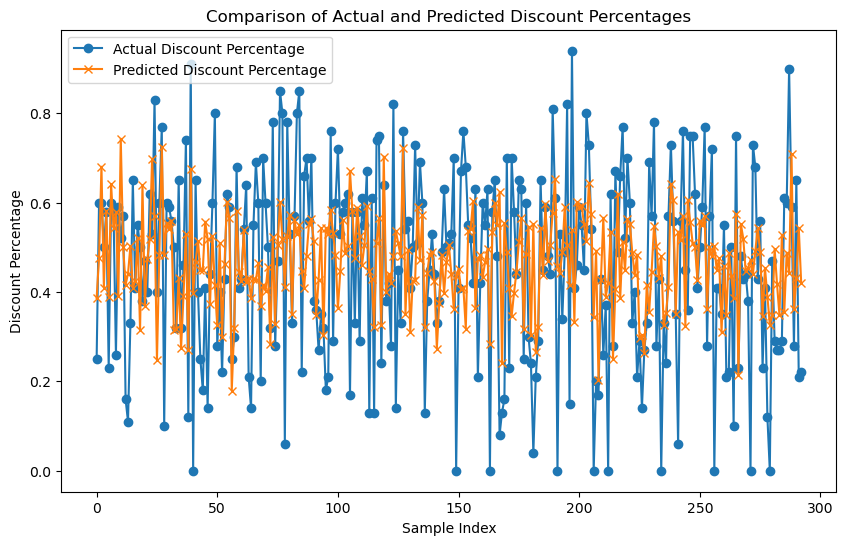

In [23]:
# Step 1: Make predictions using the trained model
predicted_discount_percentage = encoded_model.predict(test_inputs_encoded)

# Step 2: Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Discount Percentage': y_test.values,  # Actual discount percentage
    'Predicted Discount Percentage': predicted_discount_percentage.flatten()  # Flatten the predictions array
})

# Step 3: Add a column to show the absolute difference between actual and predicted values
comparison_df['Difference'] = abs(comparison_df['Actual Discount Percentage'] - comparison_df['Predicted Discount Percentage'])

# Display the comparison DataFrame
print(comparison_df)

# Optionally, visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Discount Percentage'].values, label='Actual Discount Percentage', marker='o')
plt.plot(comparison_df['Predicted Discount Percentage'].values, label='Predicted Discount Percentage', marker='x')
plt.title('Comparison of Actual and Predicted Discount Percentages')
plt.xlabel('Sample Index')
plt.ylabel('Discount Percentage')
plt.legend()
plt.show()

### Tab Tranformer Model - Embedded Categorical Data Using Sentence Transformer

In [24]:
# Step 1: Preprocess the Data
categorical_columns = ['product_name']
numerical_columns = ['actual_price_usd', 'discounted_price_usd', 'rating_count', 'rating']  # Now includes discounted_price_usd
target = 'discount_percentage'


# Step 2: Generate embeddings for all product names in the training data
# Convert product names to strings and ensure there are no integers
df['product_name'] = df['product_name'].astype(str)
sentence_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
product_name_embeddings = sentence_model.encode(df['product_name'].tolist())

# Convert embeddings to a numpy array
product_name_embeddings = np.array(product_name_embeddings).astype('float32')

# Step 3: Standardize numerical data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 4: Prepare data for training and testing
X_numerical = df[numerical_columns].values.astype('float32')
y = df[target].values.astype('float32')

# Split into train and test sets
X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    X_numerical, product_name_embeddings, y, test_size=0.2, random_state=42)

# Step 5: Build the TabTransformer Model
def build_tab_transformer(n_categorical, n_numerical, dropout_rate=0.1):
  # Categorical (Sentence Transformer) input
    categorical_input = Input(shape=(n_categorical,), dtype=tf.float32, name='cat_input')

    # Numerical inputs
    numerical_input = Input(shape=(n_numerical,), dtype=tf.float32, name='num_input')

    # Concatenate categorical (already embedded) and numerical inputs
    concatenated = Concatenate(axis=1)([categorical_input, numerical_input])

    # MLP Layers for final regression
    x = Dense(128, activation='relu')(concatenated)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)  # Regression output

    # Combine the model
    model = Model(inputs=[categorical_input, numerical_input], outputs=output)
    model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
    return model

# Instantiate and build the TabTransformer model
embedding_dim = sentence_model.get_sentence_embedding_dimension()  # Typically 384 for MiniLM models
n_numerical = len(numerical_columns)

embedded_model = build_tab_transformer(n_categorical=embedding_dim, n_numerical=n_numerical)

# Prepare inputs for the model
train_inputs = [X_train_cat, X_train_num]
test_inputs_embedded = [X_test_cat, X_test_num]

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = embedded_model.fit(train_inputs, y_train, validation_data=(test_inputs_embedded, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Step 6: Evaluate the model
test_loss, test_mae = embedded_model.evaluate(test_inputs_embedded, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0867 - mean_absolute_error: 0.2370 - val_loss: 0.0466 - val_mean_absolute_error: 0.1745
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - mean_absolute_error: 0.1655 - val_loss: 0.0361 - val_mean_absolute_error: 0.1504
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.1504 - val_loss: 0.0367 - val_mean_absolute_error: 0.1536
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - mean_absolute_error: 0.1419 - val_loss: 0.0339 - val_mean_absolute_error: 0.1446
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254 - mean_absolute_error: 0.1254 - val_loss: 0.0337 - val_mean_absolute_error: 0.1425
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - mean_absolute_error: 0.1192 - val_loss: 0.0325 - val_mean_absolute_error: 0.1385
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236 - mean_absolute_error: 0.1187 - val_loss

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
     Actual Discount Percentage  Predicted Discount Percentage  Difference
0                          0.25                       0.357083    0.107083
1                          0.60                       0.484245    0.115755
2                          0.60                       0.590326    0.009674
3                          0.50                       0.629368    0.129368
4                          0.58                       0.692683    0.112683
..                          ...                            ...         ...
288                        0.59                       0.503940    0.086060
289                        0.28                       0.105484    0.174516
290                        0.65                       0.702411    0.052411
291                        0.21                       0.405835    0.195835
292                        0.22                       0.257929    0.037929

[293 rows x 3 columns]


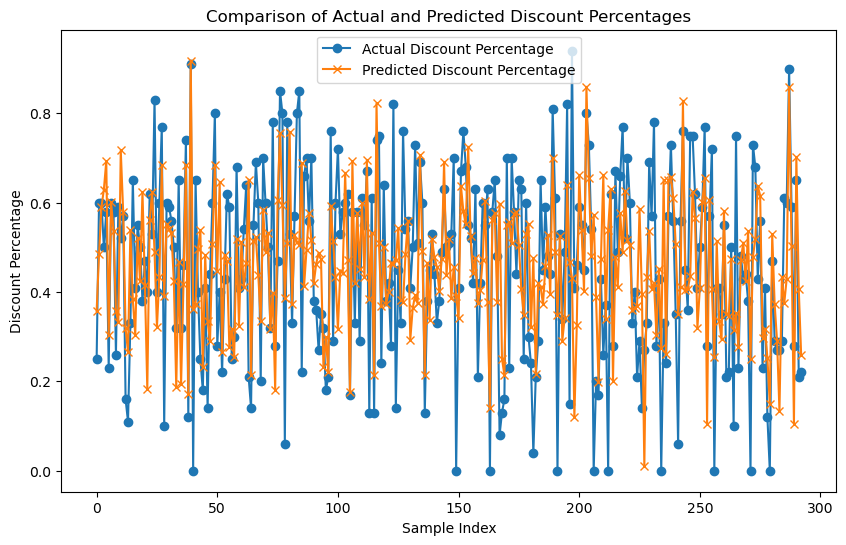

In [25]:
# Stoep 1: Make predictions using the trained model
predicted_discount_percentage = embedded_model.predict(test_inputs_embedded)

# Step 2: Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Discount Percentage': y_test,  # Actual discount percentage
    'Predicted Discount Percentage': predicted_discount_percentage.flatten()  # Flatten the predictions array
})

# Step 3: Add a column to show the absolute difference between actual and predicted values
comparison_df['Difference'] = abs(comparison_df['Actual Discount Percentage'] - comparison_df['Predicted Discount Percentage'])

# Display the comparison DataFrame
print(comparison_df)

# Optionally, visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Discount Percentage'].values, label='Actual Discount Percentage', marker='o')
plt.plot(comparison_df['Predicted Discount Percentage'].values, label='Predicted Discount Percentage', marker='x')
plt.title('Comparison of Actual and Predicted Discount Percentages')
plt.xlabel('Sample Index')
plt.ylabel('Discount Percentage')
plt.legend()
plt.show()

## Compare Both Tab Transformer Models

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Function to evaluate a model
def evaluate_model(model, test_inputs, y_test):
    # Predict the target values
    predictions = model.predict(test_inputs)
    
    # Compute the metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return mae, mse, r2

# Evaluate both the encoded model and the embedded model
encoded_model_mae, encoded_model_mse, encoded_model_r2 = evaluate_model(encoded_model, test_inputs_encoded, y_test)
embedded_model_mae, embedded_model_mse, embedded_model_r2 = evaluate_model(embedded_model, test_inputs_embedded, y_test)

# Create a DataFrame to display the results side by side
comparison_df = pd.DataFrame({
    'Model': ['Encoded Model', 'Embedded Model'],
    'Mean Absolute Error (MAE)': [encoded_model_mae, embedded_model_mae],
    'Mean Squared Error (MSE)': [encoded_model_mse, embedded_model_mse],
    'R2 Score': [encoded_model_r2, embedded_model_r2]
})

# Display the comparison table
print(comparison_df)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
            Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0   Encoded Model                   0.152784                  0.038491   
1  Embedded Model                   0.137171                  0.031129   

   R2 Score  
0  0.154836  
1  0.316479  


Save the Embedded Model, Sentence Transformer and Scaler. These will be used for streamlit web app for user interface. 

In [27]:
import pickle

# Save the model
embedded_model.save('embedded_tabtransformer_model.keras')

# Save the Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Saving the SentenceTransformer model
sentence_model.save("sentence_transformer_model")

New Amazon Data: You can input Amazon data directly to this file in the dictionary below to interact with model on this interface. The same function was used in streamlit app for front facing application as well. 

In [28]:
new_data = {
"product_name":"Bloom Nutrition Superfood Greens Powder, Digestive Enzymes with Probiotics and Prebiotics, Gut Health, Bloating Relief for Women, Chlorella, Juice Mix w/Beet Root Powder, 30 SVG, Orange Passionfruit",
"discounted_price_usd":34.99,
"actual_price_usd":36.99,
"rating":4.3,
"rating_count":8183
}

In [29]:
def predict_discount(input_data, n_samples=100):
    try:
        print(f"Original input data: {input_data}")

        embedded_model.trainable = False  # Optional, to ensure the model isn't updating

        # Generate the sentence embedding for the product name using sentence_model
        product_name = input_data.get('product_name', '')
        product_name_embedding = sentence_model.encode([product_name])  # Encode the product name

        # Apply log transformation to rating_count
        input_data['rating_count'] = np.log1p(input_data['rating_count'])

        # Ensure the numerical columns are correctly parsed
        numerical_columns = ['discounted_price_usd', 'actual_price_usd', 'rating', 'rating_count']
        numerical_data = []
        for col in numerical_columns:
            if col in input_data:
                try:
                    num_val = float(input_data[col])
                    numerical_data.append(num_val)
                except ValueError:
                    print(f"Invalid data for {col}: {input_data[col]}")
                    raise ValueError(f"Invalid data for {col}: {input_data[col]}")
            else:
                print(f"Missing value for {col}")
                raise ValueError(f"Missing value for {col}")

        # Reshape numerical data and scale
        numerical_data = np.array(numerical_data).reshape(1, -1)
        scaled_numerical_data = scaler.transform(numerical_data)
        
        # Combine the sentence embedding (categorical data) and scaled numerical data
        categorical_data = np.array(product_name_embedding).reshape(1, -1)  # Product name embedding

        # Combine categorical (embedding) and numerical data
        input_combined = [categorical_data, scaled_numerical_data]
        
        # Perform multiple predictions with dropout enabled at inference time
        dropout_predictions = []
        for _ in range(n_samples):
            prediction = embedded_model(input_combined, training=True)  # Enable dropout at inference
            dropout_predictions.append(prediction[0][0])

        # Compute the mean and standard deviation of the predictions (for uncertainty)
        dropout_predictions = np.array(dropout_predictions)
        mean_prediction = np.mean(dropout_predictions)
        std_prediction = np.std(dropout_predictions)

        print(f"Dropout-based mean prediction: {mean_prediction}")
        print(f"Dropout-based standard deviation (uncertainty): {std_prediction}")

        # Assuming the output is a continuous value, clip between 0 and 1
        final_prediction = np.clip(mean_prediction, 0, 1)

        # Compute confidence (lower std means higher confidence)
        confidence = 1 - std_prediction  # Adjust this formula based on your confidence threshold

        return final_prediction, confidence
    
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

In [31]:
predicted_discount, confidence = predict_discount(new_data)
print(f"Predicted discount for dummy data: {predicted_discount}")
print(f"Confidence: {confidence}")

Original input data: {'product_name': 'Bloom Nutrition Superfood Greens Powder, Digestive Enzymes with Probiotics and Prebiotics, Gut Health, Bloating Relief for Women, Chlorella, Juice Mix w/Beet Root Powder, 30 SVG, Orange Passionfruit', 'discounted_price_usd': 34.99, 'actual_price_usd': 36.99, 'rating': 4.3, 'rating_count': 9.009936307631463}
Dropout-based mean prediction: 0.28397876024246216
Dropout-based standard deviation (uncertainty): 0.5790565013885498
Predicted discount for dummy data: 0.28397876024246216
Confidence: 0.4209434986114502


/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
